In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_original = pd.read_csv("/Users/ramyanee/Downloads/ML/dataset_3.csv")
data = data_original.copy().drop('No',axis=1)
data = data.sample(frac=1)
data["Date"] = pd.to_datetime(data[['year','month','day']])

In [3]:
data.head()

,year,month,day,hour,A,B,C,D,E,F,G,H,Date
29164,2013,4,30,4,11.0,-7,12.0,1014.0,NW,1.79,0,0,2013-04-30
39727,2014,7,14,7,24.0,17,24.0,1003.0,NW,11.62,0,0,2014-07-14
636,2010,1,27,12,143.0,-9,4.0,1014.0,NW,4.92,0,0,2010-01-27
7339,2010,11,2,19,NaN,-6,10.0,1025.0,SE,20.56,0,0,2010-11-02
14485,2011,8,27,13,71.0,18,27.0,1013.0,SE,9.84,0,0,2011-08-27


In [4]:
data_original.head()

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data.E.unique()
data['E'] = le.fit_transform(data['E'])
data

,year,month,day,hour,A,B,C,D,E,F,G,H,Date
29164,2013,4,30,4,11.0,-7,12.0,1014.0,1,1.79,0,0,2013-04-30
39727,2014,7,14,7,24.0,17,24.0,1003.0,1,11.62,0,0,2014-07-14
636,2010,1,27,12,143.0,-9,4.0,1014.0,1,4.92,0,0,2010-01-27
7339,2010,11,2,19,NaN,-6,10.0,1025.0,2,20.56,0,0,2010-11-02
14485,2011,8,27,13,71.0,18,27.0,1013.0,2,9.84,0,0,2011-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33604,2013,11,1,4,308.0,2,4.0,1027.0,1,0.89,0,0,2013-11-01
9978,2011,2,20,18,472.0,-4,6.0,1026.0,2,8.05,0,0,2011-02-20
4215,2010,6,25,15,118.0,14,31.0,1007.0,2,7.15,0,0,2010-06-25
13038,2011,6,28,6,127.0,18,22.0,1002.0,2,0.89,0,0,2011-06-28


In [6]:
data.isnull().sum()

year        0
month       0
day         0
hour        0
A        2067
B           0
C           0
D           0
E           0
F           0
G           0
H           0
Date        0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
A,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
B,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
C,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
D,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
E,43824.0,1.663267,0.937981,0.00,1.00,2.00,2.00,3.0
F,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


<AxesSubplot:xlabel='Date', ylabel='A'>

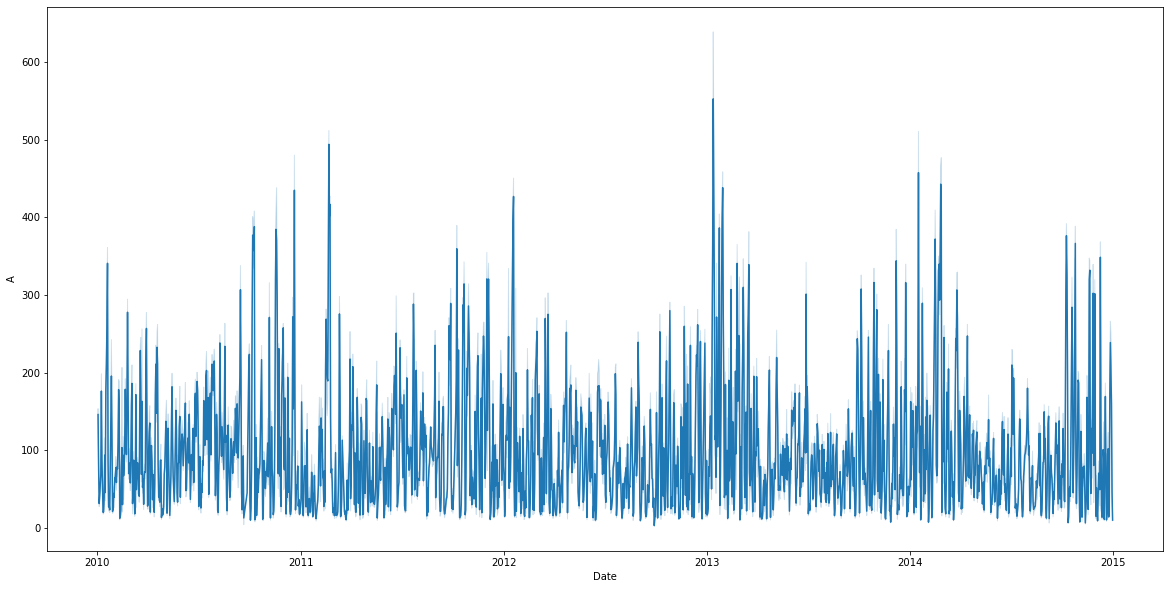

In [8]:
d = data.copy()
d["Date"] = pd.to_datetime(d[['year','month','day']])
plt.figure(figsize=(20,10))
sns.lineplot(data=d,x='Date', y='A')



In [9]:
#y.loc[2010,1]

In [10]:
df_mean = data.copy()
years = data['year'].unique()

for i in years:
  x =data[data.year==i].groupby('month').mean().A
  df_mean['A'] = df_mean.apply(
      lambda row: x[row['month']] if np.isnan(row['A']) and row['year'] == i else row['A'],
      axis=1
  )

In [11]:
data['A'].mode()

0    16.0
dtype: float64

In [12]:
df_mode = data.copy()



In [13]:
df_mode['A'] = df_mode.apply(
      lambda row: 16 if np.isnan(row['A']) else row['A'],
      axis=1
  )

In [14]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 29164 to 2793
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    43824 non-null  int64         
 1   month   43824 non-null  int64         
 2   day     43824 non-null  int64         
 3   hour    43824 non-null  int64         
 4   A       43824 non-null  float64       
 5   B       43824 non-null  int64         
 6   C       43824 non-null  float64       
 7   D       43824 non-null  float64       
 8   E       43824 non-null  int64         
 9   F       43824 non-null  float64       
 10  G       43824 non-null  int64         
 11  H       43824 non-null  int64         
 12  Date    43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 4.7 MB


<AxesSubplot:xlabel='Date', ylabel='A'>

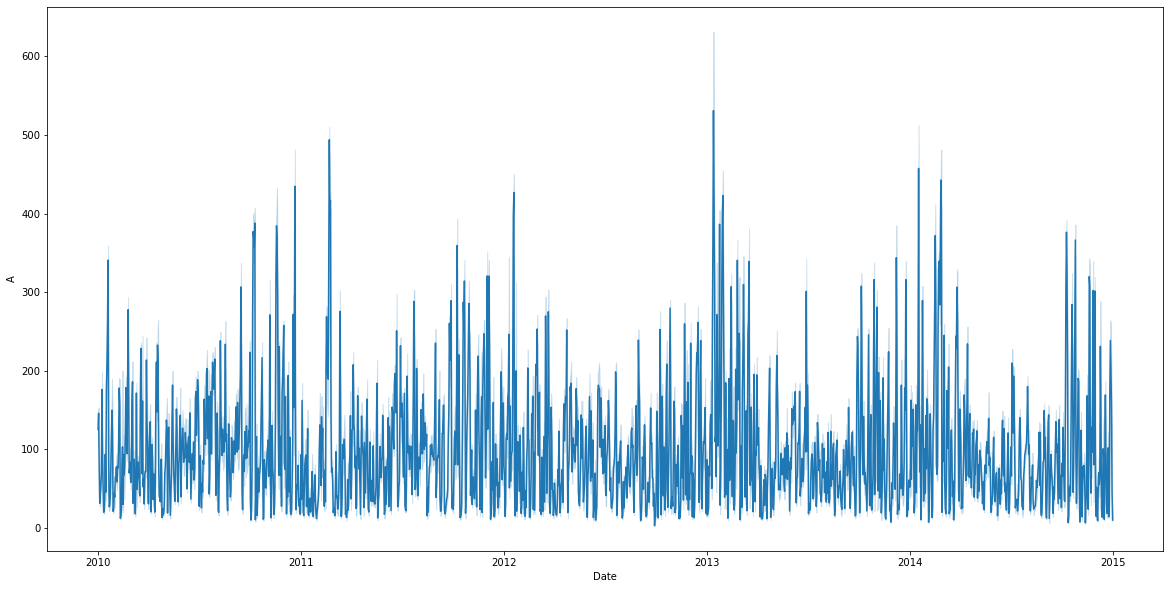

In [15]:
df_intrp = data.copy()
df_intrp = df_intrp.interpolate()
df_intrp["Date"] = pd.to_datetime(df_intrp[['year','month','day']])
plt.figure(figsize=(20,10))
sns.lineplot(data=df_intrp,x='Date', y='A')

In [16]:
def tts(data,target):
  size = len(data)
  train_test_margin = int(0.75*size)

  trainSet = data[:train_test_margin]
  testSet = data[train_test_margin:]

  trainSet_x = trainSet.drop(target,axis=1)
  trainSet_y = trainSet[target]
  testSet_x = testSet.drop(target,axis=1)
  testSet_y = testSet[target]

  return trainSet_x,trainSet_y,testSet_x,testSet_y

In [17]:
def acc_(predictions,testSet_y):
  test_size = len(testSet_y)
  testSet_y = list(testSet_y)
  correct_predictions = 0
  for i in range(test_size):
    if testSet_y[i]==predictions[i]:
      correct_predictions= correct_predictions+1
  return (correct_predictions/test_size)*100

In [18]:

xtrain,ytrain,xtest,ytest = tts(data.drop('Date',axis=1).dropna(),'month')

In [19]:
ytrain

29164     4
39727     7
636       1
14485     8
41895    10
         ..
35862     2
2429      4
15549    10
34420    12
38486     5
Name: month, Length: 31317, dtype: int64

part 1

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini")
c = model.fit(xtrain,ytrain)
p = model.predict(xtest)
acc_(p,ytest)

82.36590038314176

In [21]:
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
acc_(p,ytest)

83.5249042145594

In [22]:

xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))


84.74808324205915
83.4154801022271


In [23]:
xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

83.90836071558964
82.18327856882074


In [24]:
xtrain,ytrain,xtest,ytest = tts(df_mode.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_mode.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

83.93574297188755
83.442862358525


In [25]:
xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

83.73493975903614
82.6305220883534


part 2

In [26]:
depths = [2, 4, 8, 10, 12, 30]

In [27]:
training_accuracies = []
testing_accuracies = []
xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')

In [28]:
for i in depths:
  model = DecisionTreeClassifier(criterion="entropy",max_depth=i)
  c = model.fit(xtrain,ytrain)
  testing_accuracies.append(acc_(model.predict(xtest),ytest))
  training_accuracies.append(acc_(model.predict(xtrain),ytrain))

Text(0.5, 0, 'tree depths')

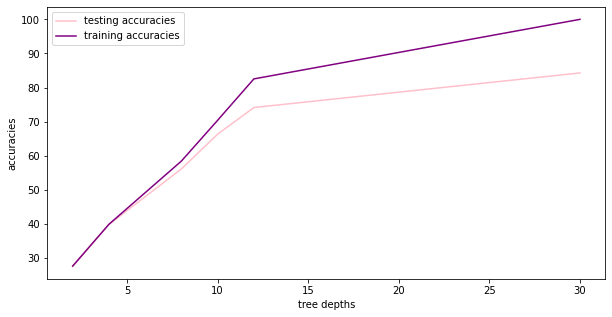

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x = depths, y=testing_accuracies, color='pink',label='testing accuracies').set_ylabel('accuracies')
sns.lineplot(x = depths, y=training_accuracies, color='purple',label='training accuracies').set_xlabel('tree depths')


In [30]:
def ens(train_data,target,maxdepth,xtest,iter):
  p_tr = []
  p_ts = [] 
  for i in range(iter):
    d = train_data.sample(frac=0.4)
    xtrain,ytrain = d.drop(target,axis=1),d[target]
    model = DecisionTreeClassifier(criterion="entropy",max_depth=maxdepth)
    c = model.fit(xtrain,ytrain) 
    p_ts.append(model.predict(xtest))
    p_tr.append(model.predict(train_data.drop(target,axis=1)))
    
  return p_ts,p_tr




In [31]:
target = 'month'
size = len(df_mean)
train_test_margin = int(0.75*size)

train_data = df_mean[:train_test_margin].drop('Date',axis = 1)
test_data = df_mean[train_test_margin:].drop('Date',axis = 1)

xtest = test_data.drop(target,axis=1)
ytest = test_data[target]

In [32]:
p,q = ens(train_data,'month',4,xtest,150)

majority voting

In [33]:
# # p = test predictions, q = training predictions
p,q = pd.DataFrame(np.matrix(p)).transpose(), pd.DataFrame(np.matrix(q)).transpose()


In [34]:
p,q = p.mode(axis=1),q.mode(axis=1)


In [35]:
p,q = np.array(p[0]).astype(int),np.array(q[0]).astype(int)

In [36]:
acc_(p,list(ytest))

40.927345746622855

part 4

In [37]:
0.4*0.75

0.30000000000000004

In [38]:
depth = [5, 7, 13, 15, 25,30]
trees = [50,100,120,150,200,300]

In [39]:
target = 'month'
size = len(df_intrp)
train_test_margin = int(0.75*size)

train_data = df_intrp[:train_test_margin].drop('Date',axis = 1)
test_data = df_intrp[train_test_margin:].drop('Date',axis = 1)

xtest = test_data.drop(target,axis=1)
ytest = test_data[target]


In [40]:
size

43824

In [41]:

n_trees = []
T = []
Ts = []

In [42]:
for t in range(len(trees)):
  test_acc = []#contains accuracies for each value of depth for current number of trees
  train_acc = []
  n_depths = [] 
  for i in range(len(depth)):
    
    z,w = ens(train_data,'month',depth[i],xtest,trees[t])# t trees with depth depth[i]
    z,w = pd.DataFrame(np.matrix(z)).transpose(), pd.DataFrame(np.matrix(w)).transpose()
    z,w = z.mode(axis=1),w.mode(axis=1)
    z,w = np.array(z[0]).astype(int),np.array(w[0]).astype(int)
    p = acc_(z,ytest)
    q = acc_(w,ytrain)
    d = depth[i]
#     test_acc.append(p)
#     train_acc.append(q)
#     n_depths = d
    T.append([p,q,d,t])
  


In [43]:
G = pd.DataFrame(T,columns=['test accuracy','training accuracy','depth','number of trees'])

In [44]:
G

,test accuracy,training accuracy,depth,number of trees
0,45.481928,45.369356,5,0
1,56.279664,58.461117,7,0
2,85.952903,95.652306,13,0
3,89.074480,98.807351,15,0
4,90.352318,99.537544,25,0
5,90.032859,99.555799,30,0
6,45.217233,45.259827,5,1
7,56.380066,58.348546,7,1
8,86.756115,96.202994,13,1
9,89.466959,98.992941,15,1


In [45]:
O=G

In [46]:
e = O['number of trees'].unique()

In [47]:
t =list(O['number of trees'])
    

In [48]:
for i in range(len(t)):
    t[i] = trees[t[i]]

In [49]:
t

[50,
 50,
 50,
 50,
 50,
 50,
 100,
 100,
 100,
 100,
 100,
 100,
 120,
 120,
 120,
 120,
 120,
 120,
 150,
 150,
 150,
 150,
 150,
 150,
 200,
 200,
 200,
 200,
 200,
 200,
 300,
 300,
 300,
 300,
 300,
 300]

In [50]:
O=O.drop('number of trees',axis=1)


In [51]:
O['number of trees'] = t

In [52]:
O

,test accuracy,training accuracy,depth,number of trees
0,45.481928,45.369356,5,50
1,56.279664,58.461117,7,50
2,85.952903,95.652306,13,50
3,89.074480,98.807351,15,50
4,90.352318,99.537544,25,50
5,90.032859,99.555799,30,50
6,45.217233,45.259827,5,100
7,56.380066,58.348546,7,100
8,86.756115,96.202994,13,100
9,89.466959,98.992941,15,100


In [53]:
 I=O.query('depth==5')

Text(0.5, 1.0, 'accuracies for tree depth of 5')

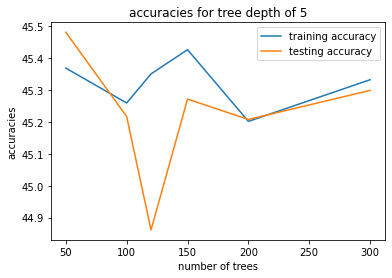

In [54]:
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 5")


Text(0.5, 1.0, 'accuracies for tree depth of 7')

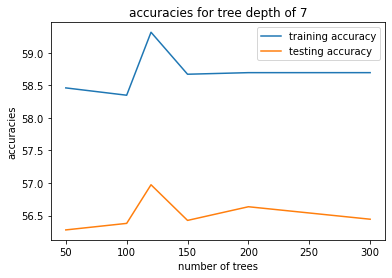

In [55]:
I=O.query('depth==7')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 7")



Text(0.5, 1.0, 'accuracies for tree depth of 13')

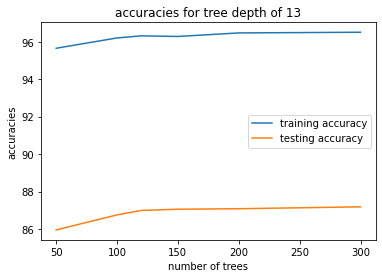

In [56]:
I=O.query('depth==13')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 13")

Text(0.5, 1.0, 'accuracies for tree depth of 15')

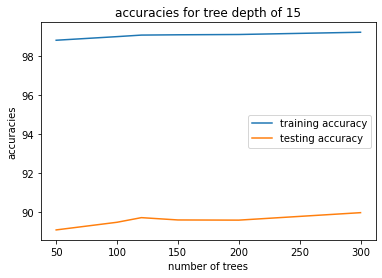

In [57]:
I=O.query('depth==15')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 15")

Text(0.5, 1.0, 'accuracies for tree depth of 25')

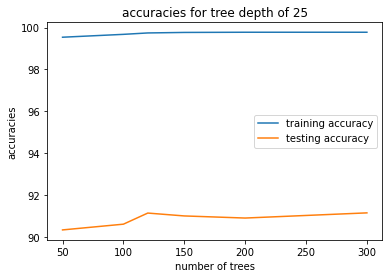

In [58]:
I=O.query('depth==25')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 25")

Text(0.5, 1.0, 'accuracies for tree depth of 30')

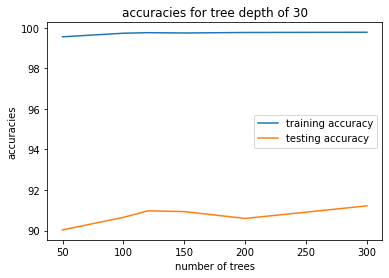

In [59]:
I=O.query('depth==30')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 30")

In [60]:
O['test accuracy'].round().mode()

0    91.0
dtype: float64

In [61]:
O['training accuracy'].round().mode()

0    100.0
dtype: float64